# Order Amount Prediction

# Milestone 1 - Data Sanity ( by using Numpy and Pandas)

Importing Libraries


In [1]:
import datetime as dt
import numpy as np
import pandas as pd

# 1) Use the PRS dataset to create a dataframe

In [2]:
df = pd.read_csv('Input_Dataset.csv')

In [3]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,20220601,74357,NR02,946056501,"4415,19",20220601,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,20220601,84052,NR04,894775488,"0,00",20220601,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,20220601,85322,NR01,909729781,"0,00",20220601,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,20220601,90538,SR04,940836817,"0,00",20220601,SGD,NaN,1210331811


# 2.Check the description of the dataframe

In [4]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


# 3. Check the shape of the dataframe

In [5]:
df.shape

(1101925, 16)

# 4. Check the data frame informations

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

# 5. Check for the Null values in the dataframe

In [7]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

# 6. Replace all the null values with "NaN"

In [8]:
# Replace null values with "NaN"
df.fillna("NaN", inplace = True)

# 7. Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"

In [9]:
def date_format(date):
    x = str(date)
    year = int(x[0:4])
    month = int(x[4:6])
    day = int(x[6:])
    return dt.datetime(year, month, day)


# Check if 'ORDER_CREATION_DATE' column exists in the DataFrame
if 'ORDER_CREATION_DATE' in df.columns:
    # Drop rows with missing values in 'ORDER_CREATION_DATE' column
    df.dropna(subset=['ORDER_CREATION_DATE'], inplace=True)

    # Down-casting date columns from float to int
    df['ORDER_CREATION_DATE'] = pd.to_numeric(df['ORDER_CREATION_DATE'], downcast='integer')

    # Applying the date formatter
    df['ORDER_CREATION_DATE'] = df['ORDER_CREATION_DATE'].apply(date_format)

    # Printing the head of the df
    print(df.head(20))
else:
    print("The 'ORDER_CREATION_DATE' column does not exist in the DataFrame.")


    CUSTOMER_ORDER_ID  SALES_ORG                  DISTRIBUTION_CHANNEL  \
0           946851639       3537              United States of America   
1           963432061       3449                            Martinique   
2           971991639       3238                               Moldova   
3           754349803       3911                  United Arab Emirates   
4           930253442       2381                                Greece   
5           819741436       3605                             Argentina   
6           756619705       4269                               Bahrain   
7           881355361       3645                               Armenia   
8           821659852       2470              United States of America   
9           957194828       3150  United States Minor Outlying Islands   
10          806322513       3396                                Serbia   
11          922237131       2353              Turks and Caicos Islands   
12          856384593       2584      

# 8. Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"

In [10]:
def date_format(date):
    x = str(date)
    year = int(x[0:4])
    month = int(x[4:6])
    day = int(x[6:])
    return dt.datetime(year, month, day)


# Down-casting date columns from float to int
df['REQUESTED_DELIVERY_DATE'] = pd.to_numeric(df['REQUESTED_DELIVERY_DATE'], downcast='integer')

# Applying the date formatter
df['REQUESTED_DELIVERY_DATE'] = df['REQUESTED_DELIVERY_DATE'].apply(date_format)

# Printing the head of the df
df.head(20)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,64.0,1210351400
5,819741436,3605,Argentina,South-Region,"0,00",N250,3290,2022-01-01,160023,NR04,787347798,"1065,33",2022-01-07,EUR,64.0,1210124309
6,756619705,4269,Bahrain,North-Region,"1974,66",9999,59,2022-01-02,73006,NR03,795887697,"0,00",2021-12-31,RON,93.0,1210109233
7,881355361,3645,Armenia,North-Region,"0,00",NAAA,3470,2022-01-02,110022,NR04,884689948,"302,85",2022-01-06,EUR,64.0,12311152
8,821659852,2470,United States of America,South-Region,"0,00",2590,3220,2022-01-02,130024,NR02,814096053,"8380,69",2022-01-06,EUR,NaN,1230021722
9,957194828,3150,United States Minor Outlying Islands,South-Region,"0,00",N241,3290,2022-01-02,133014,NR03,901859762,"545,85",2022-01-07,EUR,64.0,1210183107


In [11]:
df[["ORDER_CREATION_DATE", "REQUESTED_DELIVERY_DATE"]].dtypes

ORDER_CREATION_DATE        datetime64[ns]
REQUESTED_DELIVERY_DATE    datetime64[ns]
dtype: object

# 9.Sanity check - Check how many records are having order date greater than the delivery date

In [12]:

# Convert the date columns to datetime format if needed
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'])
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'])

# Filter the records where order date is greater than delivery date
filtered_records = df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']]

# Count the number of filtered records
count = len(filtered_records)

print(f"Number of records where order date is greater than delivery date: {count}")

Number of records where order date is greater than delivery date: 27142


# 10.Remove those records where order date is greater than the delivery date 

In [13]:
# Convert the date columns to datetime format if needed
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'])
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'])

# Filter the records where order date is less than or equal to delivery date
filtered_dataset = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]

# # Save the filtered dataset to a new CSV file
# filtered_dataset.to_csv('filtered_dataset.csv', index=False)

# Optional: Display the number of removed records
removed_records = len(df) - len(filtered_dataset)
print(f"Number of removed records: {removed_records}")

Number of removed records: 27142


# 11.Check the number of records where the “ORDER_AMOUNT” field is having “-” in it..

In [14]:
# Count the number of records where ORDER_AMOUNT has "-"
count = (df['ORDER_AMOUNT'].astype(str).str.contains('-')).sum()
print("Number of records where ORDER_AMOUNT has '-':", count)


Number of records where ORDER_AMOUNT has '-': 32


# 12.Replace “-” with “” from the “ORDER_AMOUNT” field. 

In [15]:
# Replace "-" with an empty string in the ORDER_AMOUNT field
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace('-', '')

# 13.Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..

In [16]:
# Count the number of records where ORDER_AMOUNT has ","
count = (df['ORDER_AMOUNT'].astype(str).str.contains(',')).sum()
print("Number of records where ORDER_AMOUNT has ',':", count)


Number of records where ORDER_AMOUNT has ',': 1100548


# 14.Replace “,” with “.” from the “ORDER_AMOUNT” field. 

In [17]:
# Replace "," with an "." in the ORDER_AMOUNT field
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')

# 15.Count the number of records where the order date and the delivery date are same


In [18]:
# Count the number of records where order date and delivery date are the same
count = len(df[df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']])

print(f"Number of records where order date and delivery date are the same: {count}")

Number of records where order date and delivery date are the same: 100437


# 16.Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”


In [19]:
df['ORDER_CURRENCY'].value_counts()

USD    643185
EUR    253335
AUD     68993
CAD     56508
GBP     22115
MYR     14012
PLN     11865
AED      7852
HKD      6207
CHF      5259
RON      4980
SGD      3909
CZK      2180
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

# 17.Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 

In [20]:
import requests

# Define the currency conversion API endpoint
conversion_api = 'https://api.exchangerate-api.com/v4/latest/USD'

try:
    # Make a GET request to the API endpoint
    response = requests.get(conversion_api)
    
    if response.status_code == 200:
        # Extract the conversion rates from the API response
        conversion_rates = response.json()['rates']
        
        # Convert 'ORDER_AMOUNT' column to numeric format
        df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
        
        # Define a function to convert currency to USD
        def convert_to_usd(row):
            if row['ORDER_CURRENCY'] != 'USD':
                if row['ORDER_CURRENCY'] in conversion_rates:
                    return row['ORDER_AMOUNT'] / conversion_rates[row['ORDER_CURRENCY']]
                else:
                    return float('NaN')
            else:
                return row['ORDER_AMOUNT']
        
        # Create the 'amount_in_usd' column using the conversion function
        df['amount_in_usd'] = df.apply(convert_to_usd, axis=1)
        
        # Display the updated DataFrame
        print(df)
    else:
        print("Error: Unable to retrieve currency conversion rates.")
        
except requests.exceptions.RequestException as e:
    print("Error: ", e)


         CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VAL

# 18.Check for values “0” in the “'amount_in_usd” column.

In [22]:
# Check for values "0" in the "amount_in_usd" column
zero_values = df[df['amount_in_usd'] == 0]

if len(zero_values) > 0:
    print("There are records with a value of 0 in the 'amount_in_usd' column.")
    print(zero_values)
else:
    print("No records found with a value of 0 in the 'amount_in_usd' column.")

There are records with a value of 0 in the 'amount_in_usd' column.
         CUSTOMER_ORDER_ID  SALES_ORG DISTRIBUTION_CHANNEL      DIVISION  \
4                930253442       2381               Greece  South-Region   
6                756619705       4269              Bahrain  North-Region   
57               778638920       2373             Thailand  South-Region   
62               870847173       4352               Poland  North-Region   
67               822817658       2491          Netherlands  North-Region   
...                    ...        ...                  ...           ...   
1101891          835314074       3410               Taiwan  South-Region   
1101892          958175613       4452           Mauritania  South-Region   
1101921          998890898       4509              Armenia  South-Region   
1101922          983330221       3951                Nepal  South-Region   
1101923          926668029       3235               Panama  South-Region   

        RELEASED_CRE

# 19.Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'

In [23]:

# Convert 'CUSTOMER_NUMBER' to string type
df['CUSTOMER_NUMBER'] = df['CUSTOMER_NUMBER'].astype(str)

# Convert 'COMPANY_CODE' to string type (if necessary)
df['COMPANY_CODE'] = df['COMPANY_CODE'].astype(str)

# Create the 'unique_cust_id' column by combining 'CUSTOMER_NUMBER' and 'COMPANY_CODE'
df['unique_cust_id'] = df['CUSTOMER_NUMBER'] + df['COMPANY_CODE']

# Display the updated DataFrame
print(df)

         CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VAL

# Milestone 2 - EDA

# 1.Create a Histogram on DISTRIBUTION_CHANNEL

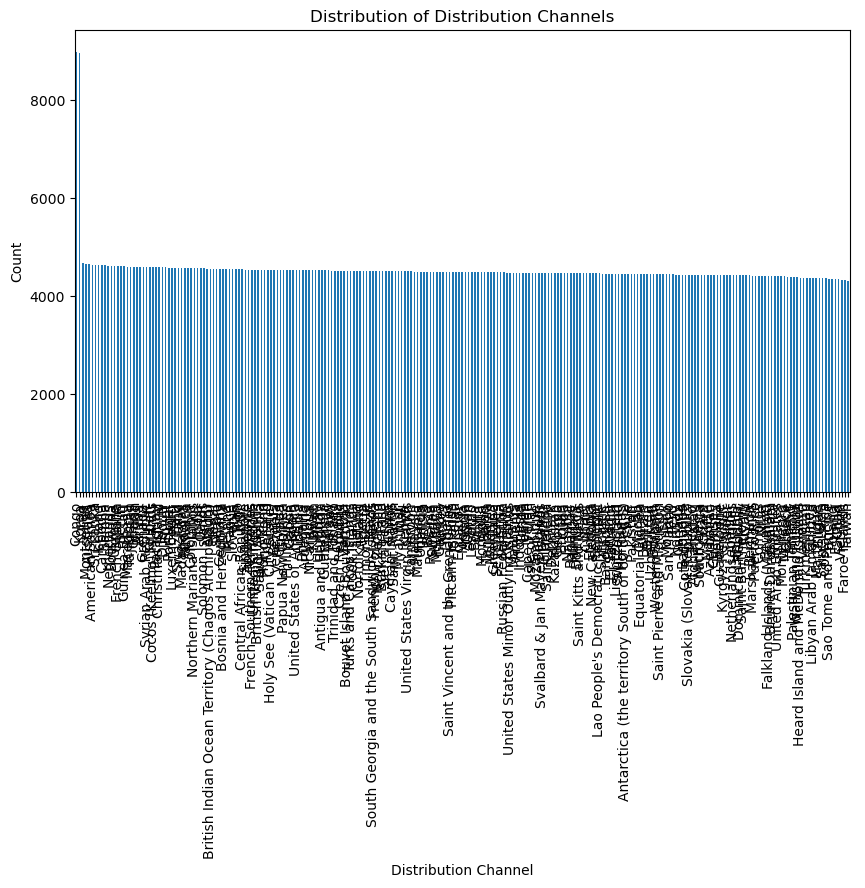

In [24]:
import matplotlib.pyplot as plt

# Create a histogram of the 'DISTRIBUTION_CHANNEL' column
plt.figure(figsize=(10, 6))  # Set the figure size
df['DISTRIBUTION_CHANNEL'].value_counts().plot(kind='bar')  # Plot the histogram
plt.xlabel('Distribution Channel')  # Set the x-label
plt.ylabel('Count')  # Set the y-label
plt.title('Distribution of Distribution Channels')  # Set the title
plt.show()  # Show the histogram


# 2.Create a Pie Chart on ORDER_CURRENCY

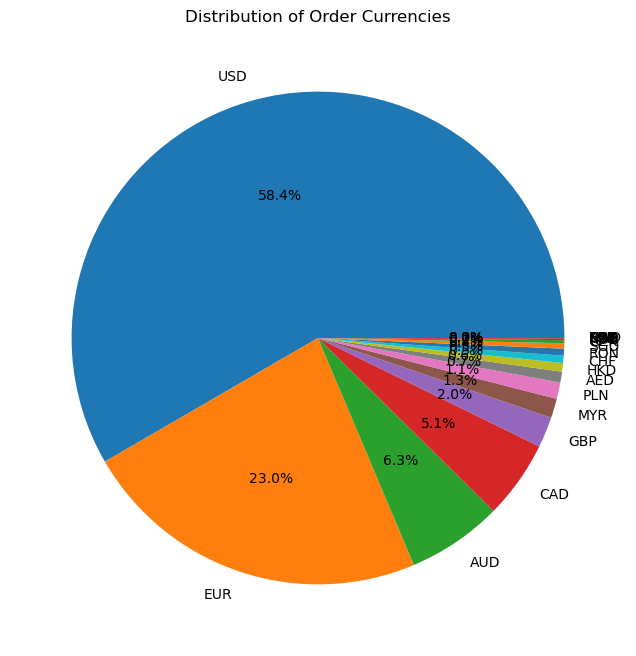

In [25]:
# Create a pie chart of the 'ORDER_CURRENCY' column
plt.figure(figsize=(8, 8))  # Set the figure size
df['ORDER_CURRENCY'].value_counts().plot(kind='pie', autopct='%1.1f%%')  # Plot the pie chart
plt.title('Distribution of Order Currencies')  # Set the title
plt.ylabel('')  # Remove the y-label
plt.show()  # Show the pie chart

# 3.Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

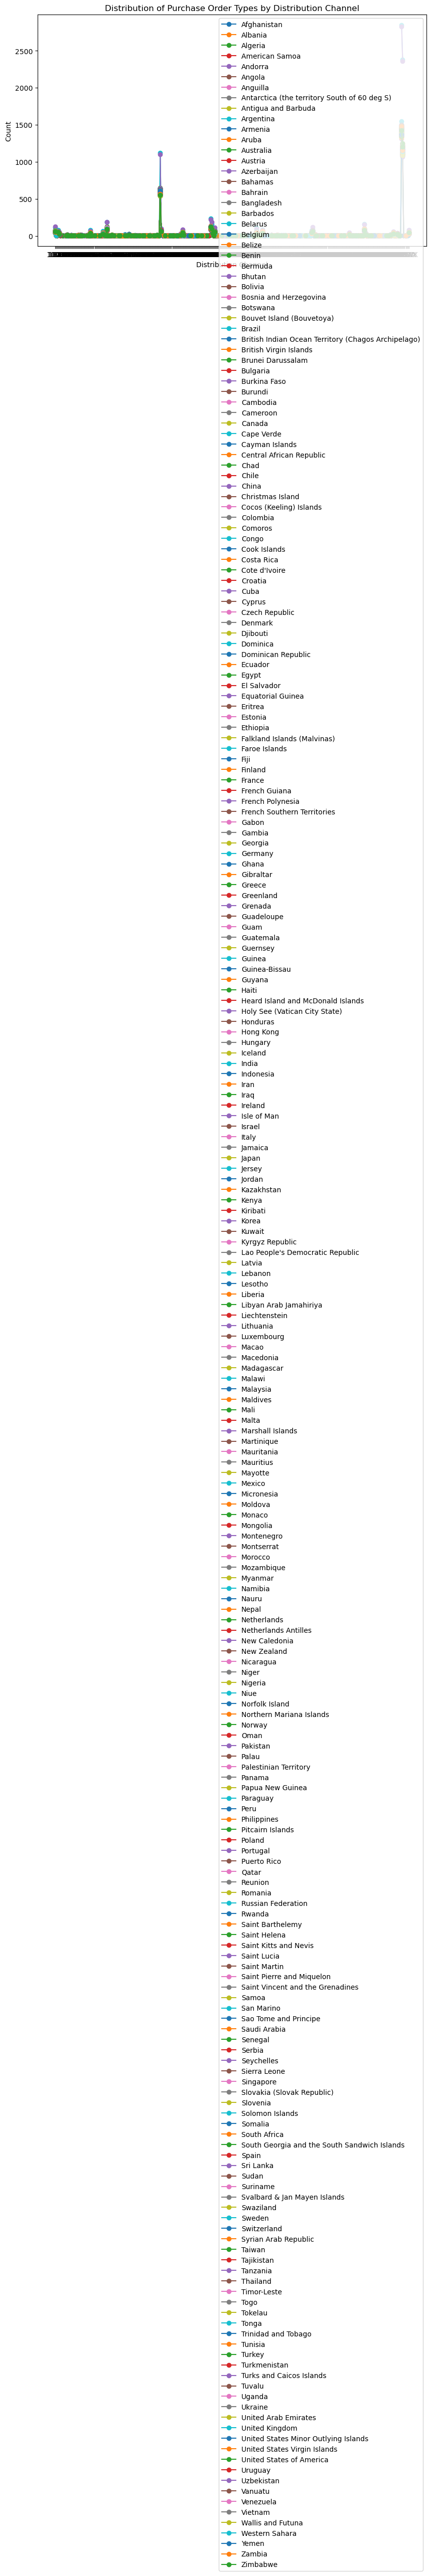

In [26]:
# Group the data by 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL' and count the occurrences
grouped_data = df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL']).size().unstack()

# Plot a line chart for each 'PURCHASE_ORDER_TYPE'
plt.figure(figsize=(10, 6))  # Set the figure size
for purchase_order_type in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[purchase_order_type], marker='o', label=purchase_order_type)

plt.xlabel('Distribution Channel')  # Set the x-label
plt.ylabel('Count')  # Set the y-label
plt.title('Distribution of Purchase Order Types by Distribution Channel')  # Set the title
plt.legend()  # Show the legend
plt.show()  # Show the line chart

# 4.Create a line plot on ORDER_CREATION_DATE and amount_in_usd

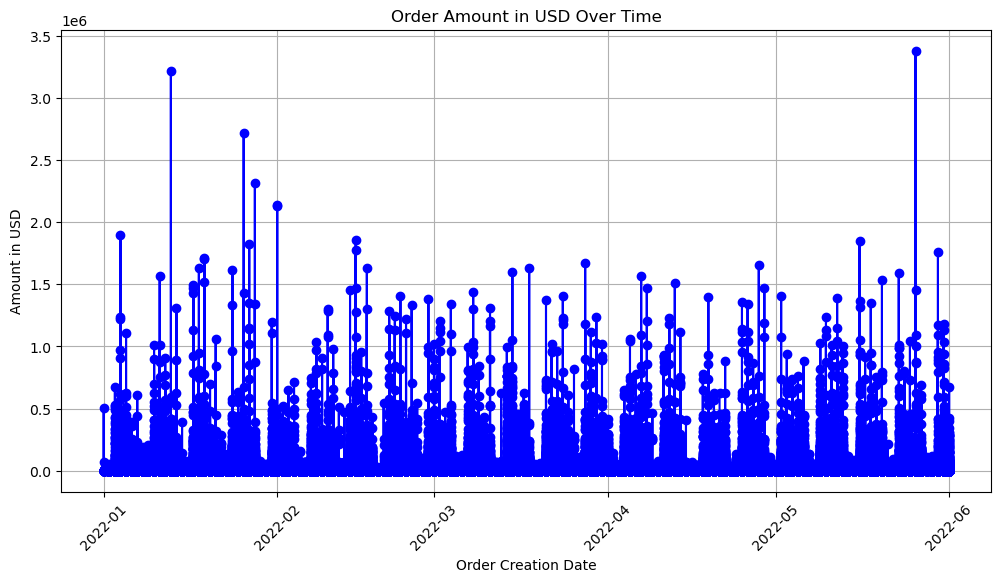

In [27]:
# Convert 'ORDER_CREATION_DATE' column to datetime type
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'])

# Sort the DataFrame by 'ORDER_CREATION_DATE'
df.sort_values('ORDER_CREATION_DATE', inplace=True)

# Plot the line chart
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df['ORDER_CREATION_DATE'], df['amount_in_usd'], marker='o', linestyle='-', color='blue')

plt.xlabel('Order Creation Date')  # Set the x-label
plt.ylabel('Amount in USD')  # Set the y-label
plt.title('Order Amount in USD Over Time')  # Set the title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Show gridlines
plt.show()  # Show the line chart

# 5. Create a boxplot on ORDER_AMOUNT	to find out the outliers

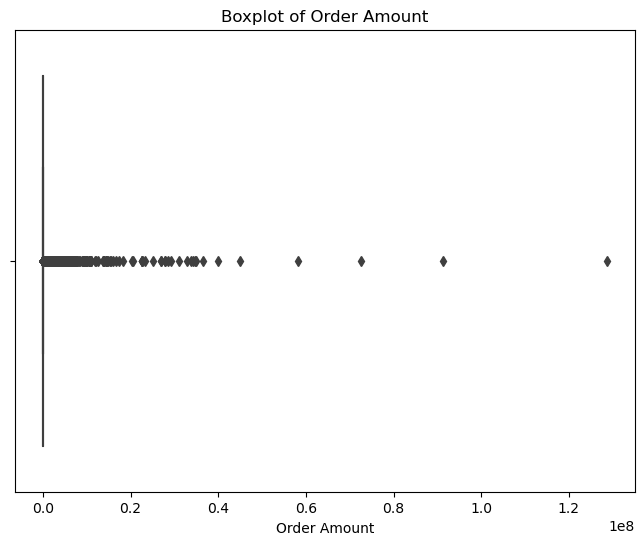

In [28]:
import seaborn as sns
# Plot the boxplot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df['ORDER_AMOUNT'])
plt.xlabel('Order Amount')  # Set the x-label
plt.title('Boxplot of Order Amount')  # Set the title
plt.show()  # Show the boxplot


# 6.Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT

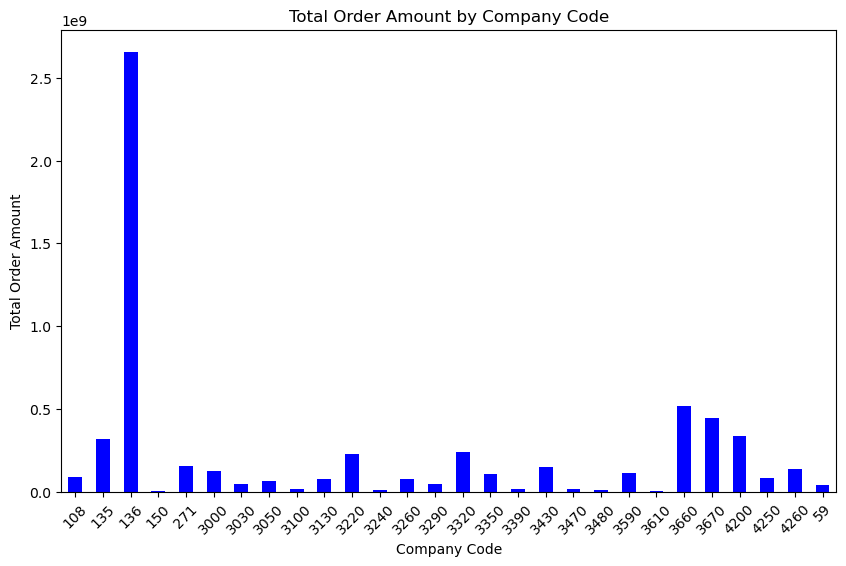

In [29]:
# Group the data by 'COMPANY_CODE' and calculate the sum of 'ORDER_AMOUNT'
grouped_data = df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
grouped_data.plot(kind='bar', color='blue')

plt.xlabel('Company Code')  # Set the x-label
plt.ylabel('Total Order Amount')  # Set the y-label
plt.title('Total Order Amount by Company Code')  # Set the title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()  # Show the bar chart

# Milestone 3 - Feature Engineering and Selection


# 1.Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

In [30]:
from scipy import stats

# Calculate the z-score for the "amount_in_usd" column
z_scores = np.abs(stats.zscore(df['amount_in_usd']))

# Set a threshold for outlier detection (e.g., z-score greater than 3)
outlier_threshold = 3

# Detect outliers using the z-score
outliers = df[z_scores > outlier_threshold]

# Calculate the IQR for the "amount_in_usd" column
Q1 = df['amount_in_usd'].quantile(0.25)
Q3 = df['amount_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers using the IQR method
outliers = df[(df['amount_in_usd'] < lower_bound) | (df['amount_in_usd'] > upper_bound)]

# Replace outliers with appropriate values (e.g., median of the column)
median_value = df['amount_in_usd'].median()
df.loc[z_scores > outlier_threshold, 'amount_in_usd'] = median_value
df.loc[(df['amount_in_usd'] < lower_bound) | (df['amount_in_usd'] > upper_bound), 'amount_in_usd'] = median_value

# Display the updated DataFrame
print(df)

         CUSTOMER_ORDER_ID  SALES_ORG         DISTRIBUTION_CHANNEL  \
0                946851639       3537     United States of America   
309984           931698777       3222              Kyrgyz Republic   
309983           766285206       2840               Cayman Islands   
309982           894767639       2769  French Southern Territories   
309981           791798584       3319                         Iraq   
...                    ...        ...                          ...   
1001972          770014438       4051                  Netherlands   
1001971          809082888       2355                        Spain   
1001970          812449310       4328                      Ireland   
1001996          814037743       3482                       Angola   
1101924          921701000       2968                    Nicaragua   

             DIVISION RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE COMPANY_CODE  \
0        South-Region                  0,00                1000         3220   

# 3.Label encoding or One hot Encoding on all the categorical columns

In [31]:

from sklearn.preprocessing import LabelEncoder

# Define the categorical columns to be encoded
categorical_columns = ['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'DIVISION',
                       'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE',
                       'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'CREDIT_CONTROL_AREA',
                       'SOLD_TO_PARTY', 'REQUESTED_DELIVERY_DATE', 'ORDER_CURRENCY',
                       'CREDIT_STATUS', 'CUSTOMER_NUMBER', 'amount_in_usd', 'unique_cust_id']

# Create a copy of the original dataframe
df_encoded = df.copy()

# Perform label encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    # Convert float values to strings
    df_encoded[column] = df_encoded[column].astype(str)
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Display the encoded dataframe
print(df_encoded)


         CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0                   865527       1437                   232         1   
309984              797528       1122                   116         0   
309983               57173        740                    40         0   
309982              632201        669                    75         0   
309981              171646       1219                   102         0   
...                    ...        ...                   ...       ...   
1001972              73741       1951                   152         0   
1001971             248665        255                   203         0   
1001970             263631       2228                   103         0   
1001996             270695       1382                     5         0   
1101924             752785        868                   156         1   

         RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                            1                    0   

# 3.Log Transformations on continuous columns 

In [32]:
# Define the continuous columns to be transformed
continuous_columns = ['RELEASED_CREDIT_VALUE', 'ORDER_AMOUNT', 'amount_in_usd']

# Create a copy of the original dataframe
df_transformed = df.copy()

# Perform log transformations
for column in continuous_columns:
    if np.issubdtype(df_transformed[column].dtype, np.number):
        # Handle zero or negative values
        mask = (df_transformed[column] <= 0)
        df_transformed.loc[~mask, column] = np.log(df_transformed.loc[~mask, column])

# Display the transformed dataframe
print(df_transformed)

         CUSTOMER_ORDER_ID  SALES_ORG         DISTRIBUTION_CHANNEL  \
0                946851639       3537     United States of America   
309984           931698777       3222              Kyrgyz Republic   
309983           766285206       2840               Cayman Islands   
309982           894767639       2769  French Southern Territories   
309981           791798584       3319                         Iraq   
...                    ...        ...                          ...   
1001972          770014438       4051                  Netherlands   
1001971          809082888       2355                        Spain   
1001970          812449310       4328                      Ireland   
1001996          814037743       3482                       Angola   
1101924          921701000       2968                    Nicaragua   

             DIVISION RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE COMPANY_CODE  \
0        South-Region                  0,00                1000         3220   

# 4.Try to extract new features by grouping existing columns

In [33]:
# Grouping existing columns and creating new features
df_grouped = df.groupby(['CUSTOMER_ORDER_ID', 'CUSTOMER_NUMBER']).agg({
    'SALES_ORG': 'mean',
    'ORDER_AMOUNT': 'sum',
    'amount_in_usd': 'count'
}).reset_index()

# Rename the new columns
df_grouped = df_grouped.rename(columns={
    'SALES_ORG': 'NEW_MEAN',
    'ORDER_AMOUNT': 'NEW_SUM',
    'amount_in_usd': 'NEW_COUNT'
})

# Display the grouped dataframe with new features
print(df_grouped)


         CUSTOMER_ORDER_ID CUSTOMER_NUMBER  NEW_MEAN  NEW_SUM  NEW_COUNT
0                753452029      1230014342    2508.0   324.14          1
1                753452292      1230014342    2212.0    78.17          1
2                753452689        12311807    2382.0     0.00          1
3                753452833        12128577    3729.0    72.91          1
4                753453192      1230014342    4479.0  1073.93          1
...                    ...             ...       ...      ...        ...
1101777          999005920      1230014337    3910.0   685.43          1
1101778          999006075      1230024538    2251.0     0.00          1
1101779          999006117      1230014342    3780.0    94.58          1
1101780          999006167      1230014364    3088.0     0.00          1
1101781          999006260      1230014193    2184.0   496.80          1

[1101782 rows x 5 columns]


# 5.Create a heatmap to find correlation between the columns


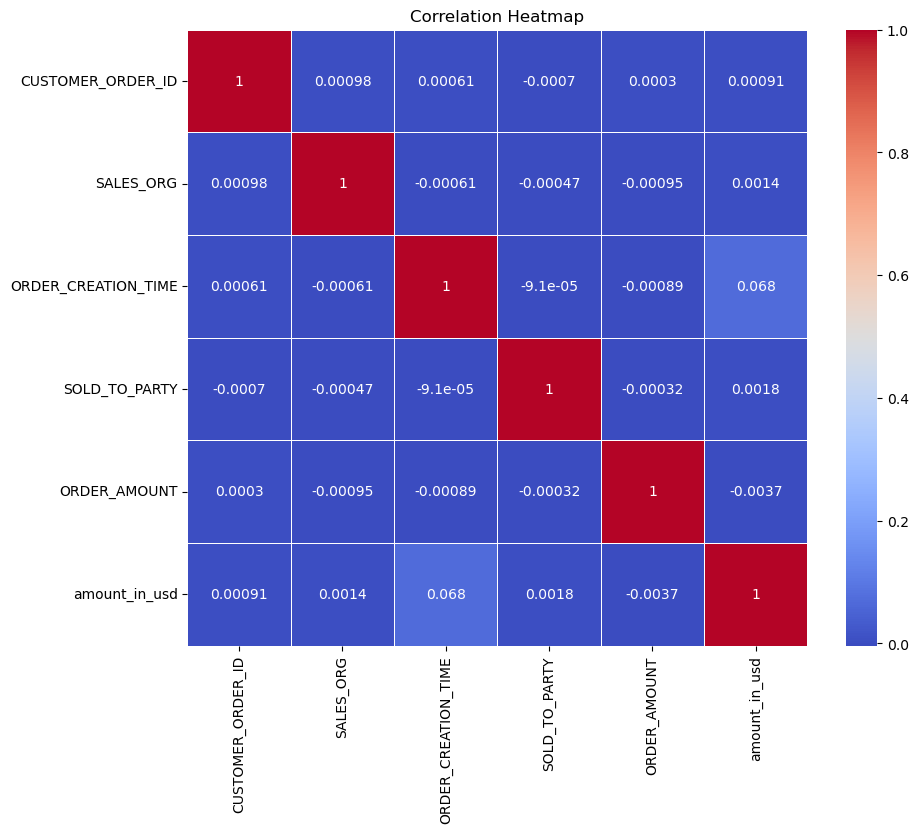

In [34]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 6.Try to identify important or relevant columns for feature extraction



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert float values in categorical columns to strings
df[categorical_columns] = df[categorical_columns].astype(str)

# Encode categorical columns with label encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Remove datetime columns from the feature set
datetime_columns = df.select_dtypes(include=['datetime64']).columns
X = df.drop(['REQUESTED_DELIVERY_DATE'] + list(datetime_columns), axis=1)  # Replace with the actual target column name

# Extract the target variable
y = df['REQUESTED_DELIVERY_DATE']

# Create an imputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Convert X back to a DataFrame
X = pd.DataFrame(X, columns=df.drop(['REQUESTED_DELIVERY_DATE'] + list(datetime_columns), axis=1).columns)

# Create a Random Forest Regressor model
rf = RandomForestRegressor()

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(importance_df.head(10))


# Milestone 4 - ML Models and Evaluations

# 1. Modify the dataset to pass into any type of machine learning models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Split the dataset into features (X) and target variable (y)
X = df.drop('ORDER_AMOUNT', axis=1)  # Replace 'target_variable' with the name of your target column
y = df['ORDER_AMOUNT']

# Handle missing values (if any)
X = X.fillna(0)  # Replace 0 with an appropriate value or strategy for handling missing values

# Encode categorical variables (if any)
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])

# Scale numerical features (if required)
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=np.number).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust the test_size as desired

# Now you can use X_train, X_test, y_train, y_test with your machine learning models


# 2.Try different machine learning models like - 


# a. Linear Regression

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Drop datetime columns from the dataframe
df_numeric = df.drop(['ORDER_CREATION_DATE', 'REQUESTED_DELIVERY_DATE'], axis=1)

# Split the dataset into features (X) and target variable (y)
X = df_numeric.drop('ORDER_AMOUNT', axis=1)
y = df_numeric['ORDER_AMOUNT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the imputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# You can also access the model's coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


In [37]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.0020996945845057624


# b. Support Vector Machine 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Drop datetime columns from the dataframe
df_numeric = df.drop(['ORDER_CREATION_DATE', 'REQUESTED_DELIVERY_DATE'], axis=1)

# Split the dataset into features (X) and target variable (y)
X = df_numeric.drop('ORDER_AMOUNT', axis=1)
y = df_numeric['ORDER_AMOUNT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the SVM model
model = SVR()
model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
